<a href="https://colab.research.google.com/github/sofiacanelag/MLUCM2223/blob/main/TRABAJO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

##1. ANÁLISIS DESCRIPTIVO DE LOS DATOS
DESCRIPCIÓN DE LAS VARIABLES
1. **id**: Identificador único para cada casa vendida
2. **date**: Fecha en la que se vendió la casa.
3. **price**: Precio de venta de la casa.
4. **bedrooms**: Número de habitaciones en la casa.
5. **bathrooms**: Número de baños en la casa. Donde 0.5 representa una habitación con un inodoro pero sin ducha
6. **sqft_living**: Área de la sala de estar de la casa en pies cuadrados.
7. **sqft_lot**: Área del terreno en pies cuadrados.
8. **floors**: Número de pisos en la casa.
9. **waterfront**: Variable binaria que indica si la casa tiene vista al agua.
10. **view**: Índice de la vista de la casa (0-4).
11. **condition**: Índice de la condición de la casa (1-5).
12. **grade**: Índice de la calidad de la construcción y diseño de la casa (1-13). Donde del 1 al 3 no cumplen con la construcción y diseño de la edificación, 7 tiene un nivel promedio de construcción y diseño, y del 11 al 13 tienen un nivel alto de calidad en la construcción y diseño.
13. **sqft_above**: Área de la casa por encima del nivel del suelo en pies cuadrados.
14. **sqft_basement**: Área del sótano de la casa en pies cuadrados.
15. **yr_built**: Año en que se construyó la casa.
16. **yr_renovated**: Año en que se renovó la casa (0 si nunca se renovó).
17. **zipcode**: Código postal de la ubicación de la casa.
18. **lat**: Latitud de la ubicación de la casa.
19. **long**: Longitud de la ubicación de la casa.
20. **sqft_living15**: Área de la sala de estar de los 15 vecinos más cercanos en pies cuadrados.
21. **sqft_lot15**: Área del terreno de los 15 vecinos más cercanos en pies cuadrados.

Estos datos describen varias características de las casas vendidas en King County, Washington, EE. UU. durante el período de mayo de 2014 a mayo de 2015

In [2]:
#Veamos una tabla de los datos con los que trabajaremos:
df = pd.read_csv('kc_house_data(2).csv')
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


###**1.1. CANTIDAD DE VALORES NULOS Y TIPOS DE VARIABLES**

In [3]:
#obtenemos info sobre los tipos de datos, nro de columnas faltantes
# vemos que no faltan columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observamos que no hay missing data.
Apreciamos la variable id, que es la variable identificadora de cada casa.
Además podemos ver de que tipo es cada variable. Vemos que la única variable categórica que nos aparece es date, pero aún así variables como *waterfront*, *view*, *condition* y *grade*, que aparecen commo enteras, también son categóricas.
Así mismo, vemos que *bathrooms* y *floors* son variables float porque, por ejemplo un aseo, de lavabo y váter, contabiliza 0,5, y o también áticos y sótanos que no contabilizan como plantas enteras.


In [4]:
duplicate_rows = df[df.duplicated()]
print(f"duplicados: {duplicate_rows.shape}")

duplicados: (0, 21)


###**1.2. VARIABLES, PROPIEDADES Y DISTRIBUCIÓN.**

In [5]:
# Hagamos copia del data frame sobre el que haremos los cambios
df_cop = df.copy()
df_cop.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Hacemos tabla de estadísticos descriptivos
df_cop.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


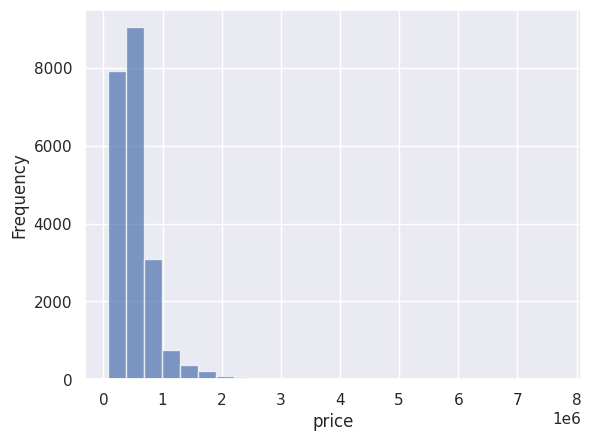

In [7]:
# Distribución de la variable objetivo
df['price'].plot.hist(alpha=0.7, bins=25, grid = True)
plt.xlabel('price')
plt.show()

Observamos que la mayor parte de las casas están entre precios bajo y medios. Según aumenta el precio, la frecuencia disminuye de manera pronunciada.

En siguiente lugar quitamos la variable identificador. Además también suprimimos las variables *date* y las relacionadas con la localización *zipcode*, *lat*, *long*, porque no serán relevantes para nuestro análisis.

In [8]:
df_cop = df_cop.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
df_cop.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


###**1.3. MATRIZ DE CORRELACIONES**

,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.585379,0.082447
bathrooms,0.525138,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.568634,0.087175
sqft_living,0.702035,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.756420,0.183286
sqft_lot,0.089661,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.144608,0.718557
floors,0.256794,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.279885,-0.011269
sqft_above,0.605567,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.731870,0.194050
sqft_basement,0.323816,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,0.200355,0.017276
sqft_living15,0.585379,0.568634,0.756420,0.144608,0.279885,0.731870,0.200355,1.000000,0.183192
sqft_lot15,0.082447,0.087175,0.183286,0.718557,-0.011269,0.194050,0.017276,0.183192,1.000000


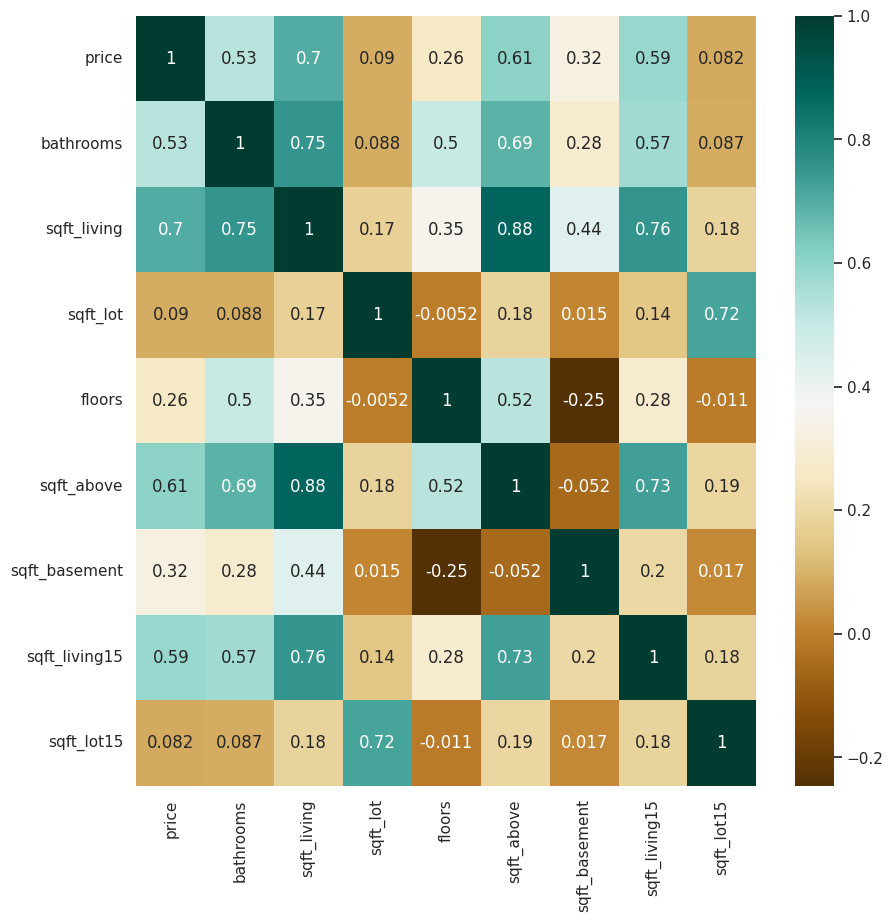

In [9]:
#Hacemos matriz de correlaciones de variables continuas
#batrooms y floors son continuas por la manera en la que se han codificado
plt.figure(figsize=(10,10))
df_cont=df_cop.drop(['bedrooms','waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'], axis=1)
corr_cont= df_cont.corr()

sns.heatmap(corr_cont,cmap="BrBG",annot=True)
corr_cont

Observamos que la variable *price*, está altamente correlacionada con *sqft_living*, *sqft_above*, *sqft_living15* y *bathrooms*, es decir con la superficie y los baños de la casa.
Las superficies tanto de la sala de estar, como la superficie por encima del nivel del suelo, están muy correlacionadas entre sí, así como con la superficie de estas mismas cosas, de los 15 vecinos más cercanos.
También, *bathrooms* está muy correlacionada con *floors* y *sqft_above*, lo que tiene mucho sentido pues suele haber 1 o 2 baños por planta, por tanto a más plantas, más baños.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


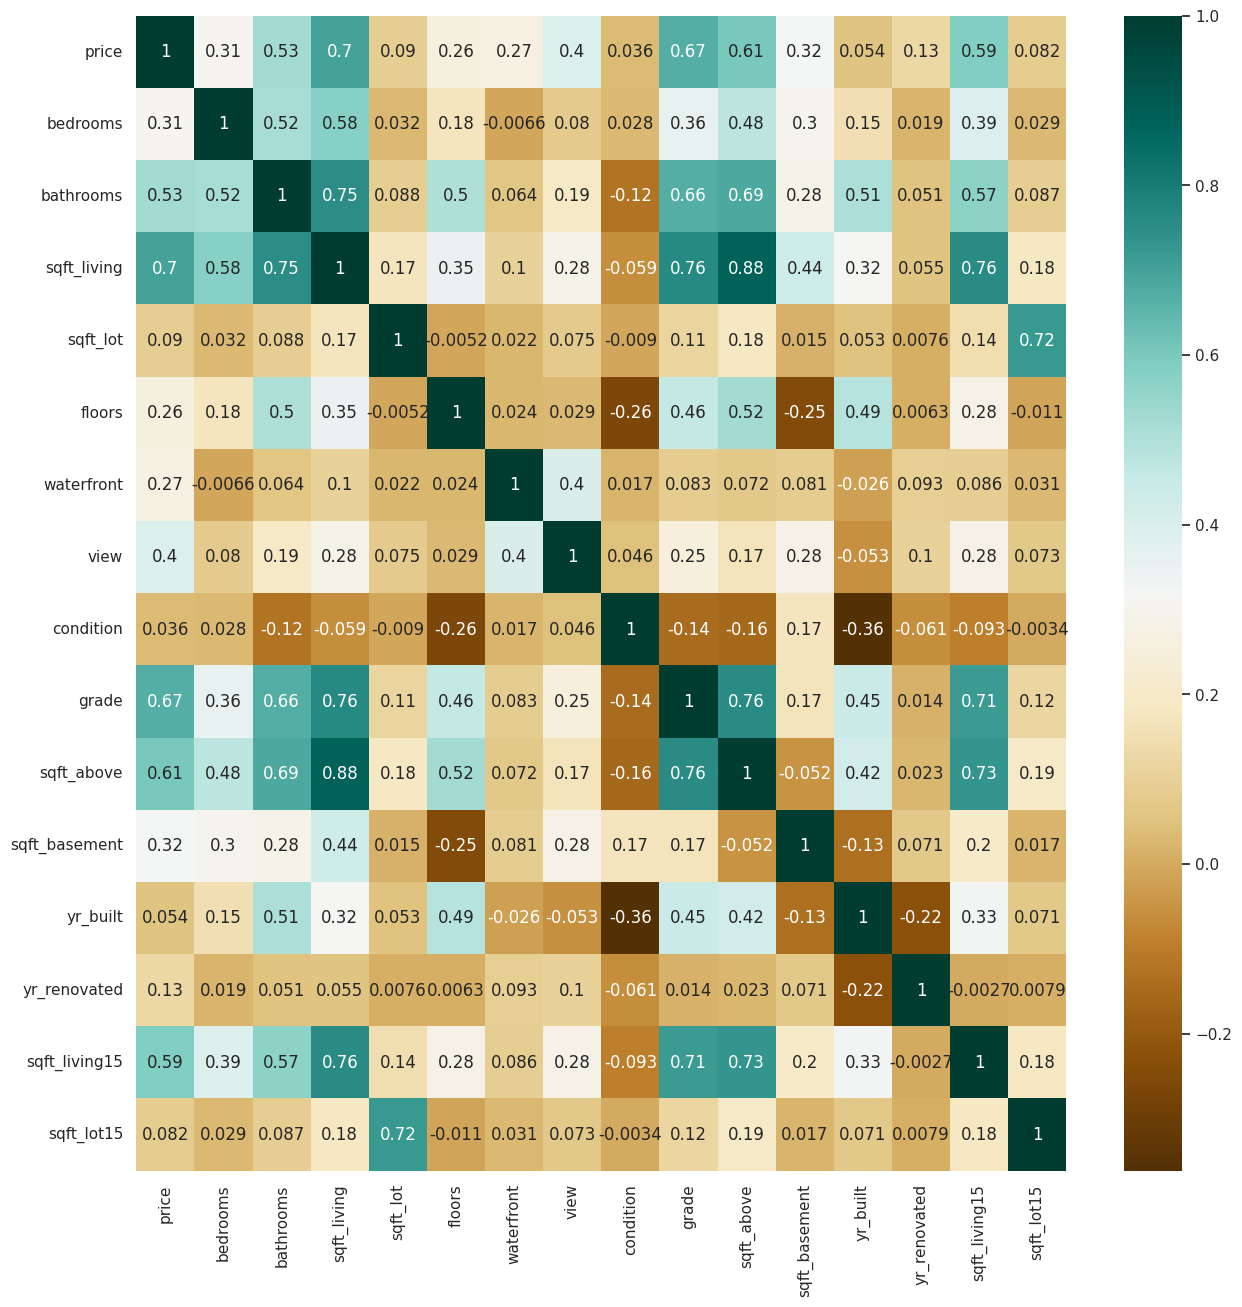

In [10]:
#Hacemos matriz de correlaciones con todas las variables
plt.figure(figsize=(15,15))
corr= df_cop.corr()

sns.heatmap(corr,cmap="BrBG",annot=True) 
corr

Vemos que *grade* tiene una alta correlación con *price*. Y por tanto presenta alta correlación con las variables superficie.
Observamos que bedrooms, también está altamente correlacionada con las variables superficie.
Además vemos que *condition* no está casi correlacionada con *price*, lo que es bastante raro. Además, *waterfront* e *yr_renovated* no están my correlacionadas con ninguna.



###2. VISUALIZACIÓN DE OUTLIERS









Veamos si puede haber presencia de outliers, ya que no presentamos valores missing

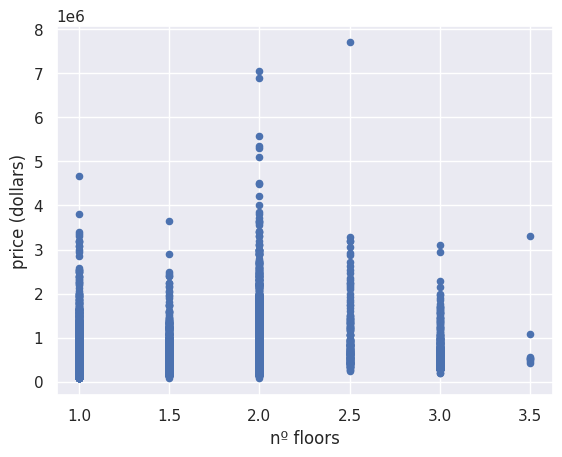

In [11]:
df_cop.plot(kind = 'scatter',x='floors',y = 'price')
plt.xlabel('nº floors')
plt.ylabel('price (dollars)')
plt.show()

Vemos que hay casas con precios muy altos, teniendo el mismo número de plantas que otras

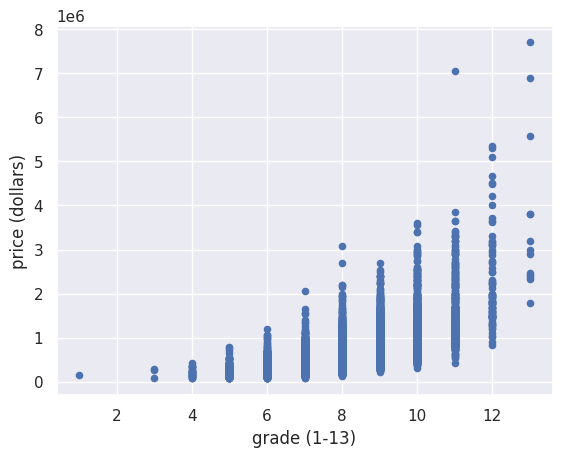

In [12]:
df_cop.plot(kind = 'scatter',x='grade',y = 'price')
plt.xlabel('grade (1-13)')
plt.ylabel('price (dollars)')
plt.show()

En este caso también vemos que hay altos precios para una calidad estándar, o precio bajos para una gran calidad.



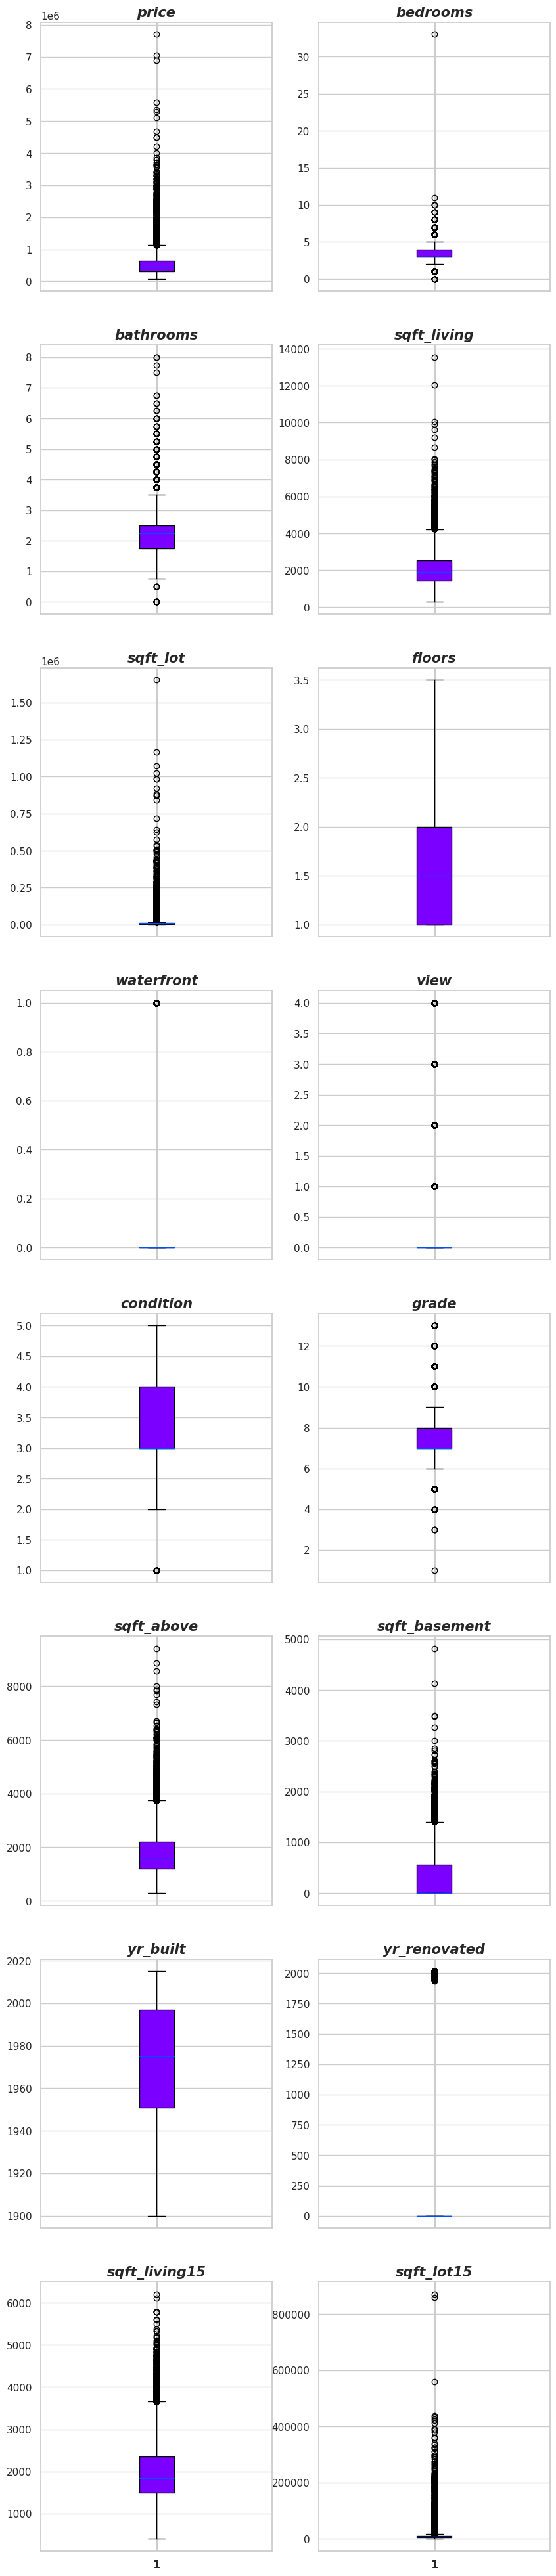

In [13]:
sns.set_theme(style='whitegrid', palette='gist_rainbow_r')
fig, axes = plt.subplots(nrows=8, ncols=2, sharex=True, figsize=(10, 50))
axes = np.reshape(axes, -1)

for j, i in enumerate(df_cop.columns):
    axes[j].boxplot(x=df_cop[i], patch_artist=True)
    axes[j].set_title(df_cop.columns[j], fontsize=15, fontweight='bold', style ='italic')

Vemos que hay muchos datos atípicos, pero igual quitarlos no sería lo mejor del mundo ya que puede que sea bueno en algunos casos saber estimar precios de casas con datos atípicos, como muchos baños o muchas habitaciones por encima de la media.

##3. TRANSFORMACIÓN DE VARIABLES

###**3.1. TRANSFORMACIÓN Y CREACIÓN DE VARIABLES**

Como vimos en la distribución de la variable objetivo, tenía una cola por la derecha, por tanto, normalizamos

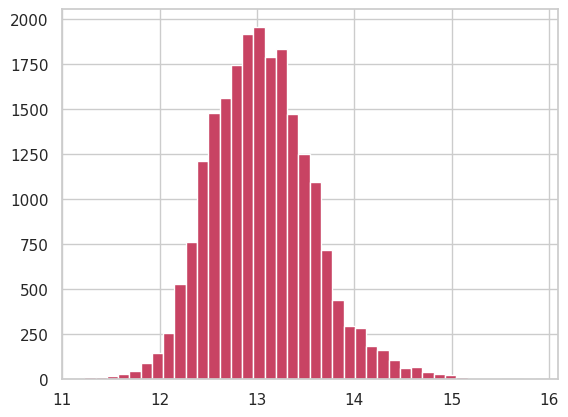

In [14]:
#Tomamos el log
df_cop['lprice'] = np.log(df_cop['price'])
plt.hist(x=df_cop['lprice'], bins=40, color='#C84363')
plt.show()

Veamos a ver las distribuciones de sqft_living y sqft_living15, y las de sqft_lot y sqft_lot15, pues ya en la matriz de correlaciones vimos que estban altamente correlacionadas

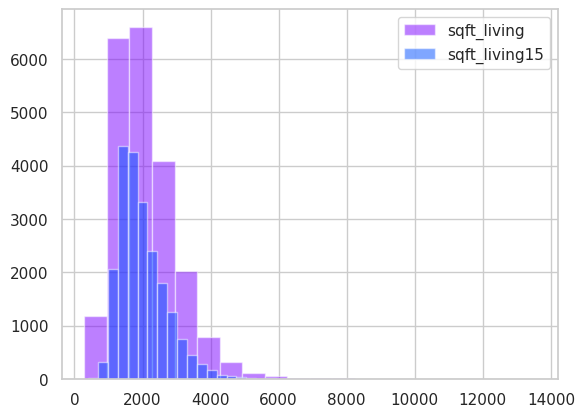

In [15]:
plt.hist(df_cop['sqft_living'], bins=20, alpha=0.5, label='sqft_living', histtype='bar')
plt.hist(df_cop['sqft_living15'], bins=20, alpha=0.5, label='sqft_living15', histtype='bar')
plt.legend(loc='upper right')
plt.show()

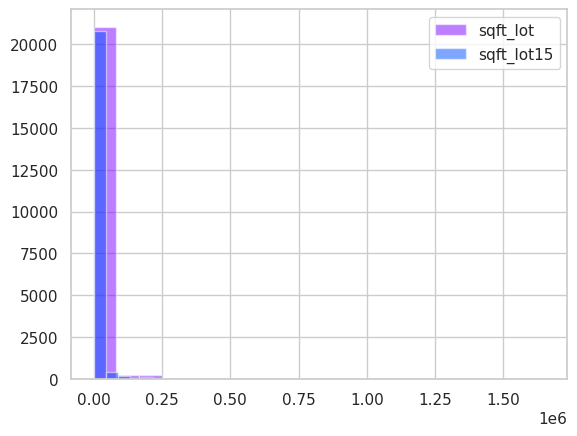

In [16]:
plt.hist(df_cop['sqft_lot'], bins=20, alpha=0.5, label='sqft_lot', histtype='bar')
plt.hist(df_cop['sqft_lot15'], bins=20, alpha=0.5, label='sqft_lot15', histtype='bar')
plt.legend(loc='upper right')
plt.show()

Vemos que tienen una distribución muy parecidas, así que prescindiremos de las variables *sqft_living15* y *sqft_lot15*, y aunque podríamos estudiar por ejemplo como el vecindario puede afectar al precio de la casa, las eliminamos para simplificar y nuestro objetivo estará en otro punto.

In [17]:
df_cop = df_cop.drop(['sqft_living15', 'sqft_lot15'], axis=1)
df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lprice
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.142166


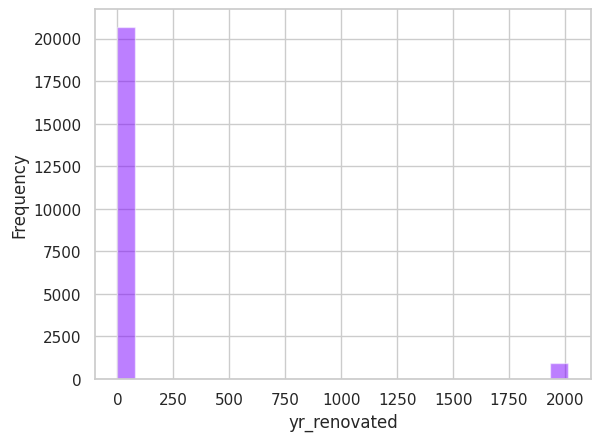

In [18]:
#Distribución de la variable yr_renovated
df['yr_renovated'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_renovated')
plt.show()

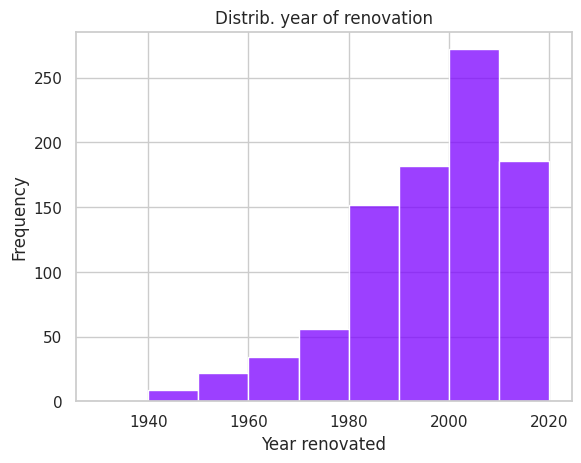

In [19]:
renovated = df[df['yr_renovated'] != 0]
sns.histplot(renovated['yr_renovated'], bins=(1930, 1940, 1950, 1960, 1970, 1980, 1990,2000, 2010, 2020))
plt.xlabel('Year renovated')
plt.ylabel('Frequency')
plt.title('Distrib. year of renovation')
plt.show()

En siguiente lugar, sabemos que yr_renovated tiene muchos ceros, y como esto puede causar problemas, hacemos la transformación que sigue

In [20]:
df_cop['yr_renovated_tr'] = np.where(df_cop['yr_renovated'] != 0, df_cop['yr_renovated'], df_cop['yr_built'])
df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lprice,yr_renovated_tr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.309982,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.195614,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,12.100712,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.311329,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.142166,1987


Ahora crearemos unas nuevas variables que pueden ser de nuestro interés en función de las correlaciones.

In [22]:
df_cop['bed/sqftliving'] = df_cop['bedrooms'] / df_cop['sqft_living']
df_cop['bath/sqftliving'] = df_cop['bathrooms'] / df_cop['sqft_living']
df_cop['sqftliving/sqftlot'] = df_cop['sqft_living'] / df_cop['sqft_lot']
df_cop['sqftabove/sqftabove'] = df_cop['sqft_above'] / df_cop['sqft_living']
df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lprice,yr_renovated_tr,bed/sqftliving,bath/sqftliving,sqftliving/sqftlot,sqftabove/sqftabove
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,12.309982,1955,0.002542,0.000847,0.208850,1.000000
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,13.195614,1991,0.001167,0.000875,0.354874,0.844358
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,12.100712,1933,0.002597,0.001299,0.077000,1.000000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,13.311329,1965,0.002041,0.001531,0.392000,0.535714
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,13.142166,1987,0.001786,0.001190,0.207921,1.000000


Ahora, reescalaremos algunas de las vaariables.

La variable *view* adopta valores enteros de 0 a 4 según las vistas de la casa, y la reescalaremos para convertirla en una variable continua del 0 al 1.

La variable *waterfront* es variable binaria que indica si la casa tiene vistas al agua. Vemos que tiene correlación con la variable *view*, pero debemos tener precaución por la naturaleza de ambas variables. Si considerásemos como buenas vistas, tener vistas al agua, podríamos prescindir de essta variable.

La variable *condition*, que indica la condición de la casa con valores entre 1 y 5, también la reescalaremos entre 0 y 1.

La variable *grade* que indica el índice de la calidad de la construcción y diseño de la casa, y toma valores entre 1 y 13, también la reescalaremos entre 0 y 1.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cop[['view_e', 'condition_e', 'grade_e']] = scaler.fit_transform(df_cop[['view', 'condition', 'grade']])
df_cop = df_cop.drop(['view', 'condition', 'grade', 'waterfront'], axis=1)

df_cop.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lprice,yr_renovated_tr,bed/sqftliving,bath/sqftliving,sqftliving/sqftlot,sqftabove/sqftabove,view_e,condition_e,grade_e
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,12.309982,1955,0.002542,0.000847,0.208850,1.000000,0.0,0.5,0.500000
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,13.195614,1991,0.001167,0.000875,0.354874,0.844358,0.0,0.5,0.500000
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,12.100712,1933,0.002597,0.001299,0.077000,1.000000,0.0,0.5,0.416667
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,13.311329,1965,0.002041,0.001531,0.392000,0.535714,0.0,1.0,0.500000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,13.142166,1987,0.001786,0.001190,0.207921,1.000000,0.0,0.5,0.583333


###**3.2.ELECCIÓN DE VARIABLES**


Ahora haremos la selección de variables que incluiremos en nuestro modelo. Utilizaremos una tabla de correlaciones con nuestra variable objetivo *price* o con *lprice*

In [24]:
matriz_corr = df_cop.corr()
matriz_corr["lprice"].sort_values(ascending=False)

lprice                 1.000000
price                  0.891654
grade_e                0.703634
sqft_living            0.695341
sqft_above             0.601801
bathrooms              0.550802
view_e                 0.346522
bedrooms               0.343561
sqft_basement          0.316970
floors                 0.310558
sqftliving/sqftlot     0.186688
yr_renovated_tr        0.130297
yr_renovated           0.114498
sqft_lot               0.099622
yr_built               0.080655
condition_e            0.039558
sqftabove/sqftabove   -0.172372
bath/sqftliving       -0.277393
bed/sqftliving        -0.537979
Name: lprice, dtype: float64

Observamos valores negativos que nos pueden confundir pues no es la predicción que teníamos.

También suprimiremos la variable *yr_renovated* y *yr_built* pues las suplimos con *yr_renovated_tr*

Además vemos que *condition_e* tiene poca correlación como *condition*, entonces también la suprimimos.

Por último suprimimos también *sqft_lot*, pues tiene una correlación muy baja con la variable objetivo y está incluida en *sqftliving/sqftlot*.

El resto las utilizaremos en un principio.

In [27]:
df_def = df_cop.loc[:, ['lprice', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqftliving/sqftlot', 'floors',
                      'view_e', 'grade_e', 'yr_renovated_tr']]
df_def.head()

,lprice,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqftliving/sqftlot,floors,view_e,grade_e,yr_renovated_tr
0,12.309982,3,1.00,1180,1180,0,0.208850,1.0,0.0,0.500000,1955
1,13.195614,3,2.25,2570,2170,400,0.354874,2.0,0.0,0.500000,1991
2,12.100712,2,1.00,770,770,0,0.077000,1.0,0.0,0.416667,1933
3,13.311329,4,3.00,1960,1050,910,0.392000,1.0,0.0,0.500000,1965
4,13.142166,3,2.00,1680,1680,0,0.207921,1.0,0.0,0.583333,1987


##4. TRAIN TEST

In [28]:
from sklearn.model_selection import train_test_split
X = df_def.drop(['lprice'], axis = 1) 
y = df_def['lprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqftliving/sqftlot,floors,view_e,grade_e,yr_renovated_tr
7291,3,1.75,2190,1390,800,0.311921,1.0,0.5,0.500000,1953
14835,3,2.50,2370,2370,0,0.346491,2.0,0.0,0.666667,1987
15880,2,1.00,1230,1230,0,0.323684,1.0,0.0,0.500000,1928
8812,4,2.25,2510,2200,310,0.251932,1.0,0.0,0.666667,1967
17220,3,1.00,1160,1160,0,0.154852,1.0,0.0,0.416667,1917
...,...,...,...,...,...,...,...,...,...,...
10955,3,2.50,1920,1920,0,0.496509,2.0,0.0,0.583333,2005
17289,4,4.50,3420,3420,0,0.459677,3.0,0.0,0.666667,2014
5192,3,1.75,1970,1570,400,0.036180,1.0,0.0,0.583333,1980
12172,3,2.25,1980,1290,690,0.225641,1.0,0.0,0.500000,1959


##5. ESCALADO DE DATOS

In [31]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.fit_transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqftliving/sqftlot',
                              'floors', 'view_e', 'grade_e', 'yr_renovated_tr'])

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqftliving/sqftlot',
                              'floors', 'view_e', 'grade_e', 'yr_renovated_tr'])
X_train_scaled_df

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqftliving/sqftlot,floors,view_e,grade_e,yr_renovated_tr
0,0.0,-0.50,0.238938,-0.166667,1.428571,0.257316,-0.5,0.5,0.0,-0.533333
1,0.0,0.25,0.398230,0.794118,0.000000,0.394477,0.5,0.0,2.0,0.222222
2,-1.0,-1.25,-0.610619,-0.323529,0.000000,0.303987,-0.5,0.0,0.0,-1.088889
3,1.0,0.00,0.522124,0.627451,0.553571,0.019300,-0.5,0.0,2.0,-0.222222
4,0.0,-1.25,-0.672566,-0.392157,0.000000,-0.365878,-0.5,0.0,-1.0,-1.333333
...,...,...,...,...,...,...,...,...,...,...
17285,0.0,0.25,0.000000,0.352941,0.000000,0.989695,0.5,0.0,1.0,0.622222
17286,1.0,2.25,1.327434,1.823529,0.000000,0.843561,1.5,0.0,2.0,0.822222
17287,0.0,-0.50,0.044248,0.009804,0.714286,-0.836729,-0.5,0.0,1.0,0.066667
17288,0.0,0.00,0.053097,-0.264706,1.232143,-0.085014,-0.5,0.0,0.0,-0.400000


Incluimos *bedrooms* e *yr_renovated_tr* a pesar de que tomen valores discretos. Debemos ser cautos con esto.

Escalamos X_train para implementar los modelos que lo requieran.

##6. MODELO DE REGRESIÓN LINEAL

Usamos los datos sin escalar

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

import statsmodels.api as sm

In [33]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('RMSE is:', rmse, ', and MAE is:', mae)

RMSE is: 0.3170971207310977 , and MAE is: 0.25053770588092317


In [36]:
X_train_sm = sm.add_constant(X_train)
lr_sm = sm.OLS(y_train, X_train_sm).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3267.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        08:59:58   Log-Likelihood:                -4765.8
No. Observations:               17290   AIC:                             9552.
Df Residuals:                   17280   BIC:                             9629.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.3358      0

Observamos que *floors* es la única variable que no es significativa individualmente a ningún nivel de significatividad (0.01, 0.05, 0.1).
También vemos que tenemos significatividad conjunta por el valor de la F. Por tanto podríamos valorar quitar o no esta variable *floors*.

Por último, tenemos un R cuadrado de 0.630, bastante alto, por lo que nuestro modelo no ajusta nada mal.

Dividiremos y_test e y_pred en decile ya que el problema de regresión no deja, en principio la configuración de clases

In [38]:
#Creamos deciles
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

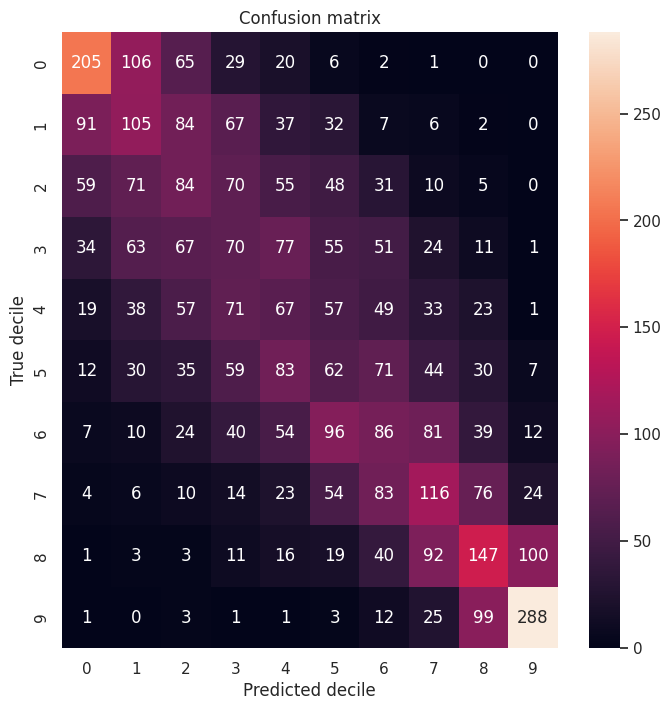

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       434
           1       0.24      0.24      0.24       431
           2       0.19      0.19      0.19       433
           3       0.16      0.15      0.16       453
           4       0.15      0.16      0.16       415
           5       0.14      0.14      0.14       433
           6       0.20      0.19      0.20       449
           7       0.27      0.28      0.28       410
           8       0.34      0.34      0.34       432
           9       0.67      0.67      0.67       433

    accuracy                           0.28      4323
   macro avg       0.28      0.28      0.28      4323
weighted avg       0.28      0.28      0.28      4323



In [39]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Vemos con esta matriz, que este modelo de predicción no es demasiado bueno.

Observamos que accuracy es de 0.28 y que precision, recall y f1-score no llegan casi al 0.5.

##7. K-NNR

Ahora, haremos KNN-Regresion, para predecir valores continuos de nuestra variable objetivo.

En este modelo en vez de usar la clase mayoritarias de los vecinos más cercanos, la técnica consiste en encontrar los valores de salida de los vecinos más cercanos a un punto de entrada dado, y luego calcular el promedio de estos valores para predecir la salida del modelo para ese punto en particular.

In [66]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [67]:
y_pred = knnr.predict(X_test_scaled)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE is:', mse, ', and MAE is:', mae, 'and R2 is:', r2)

RMSE is: 0.106005100041391 , and MAE is: 0.25016813496256773 and R2 is: 0.632929686794619


In [47]:
# Creamos deciles 
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

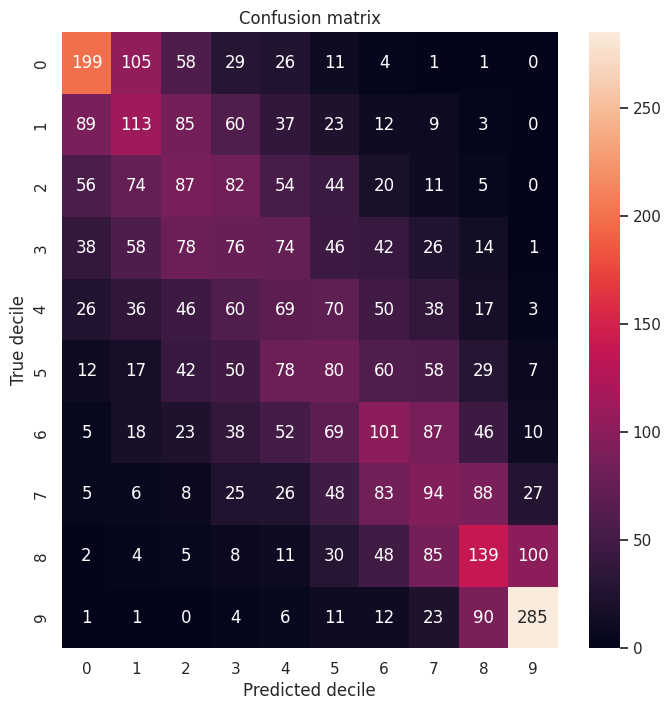

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       434
           1       0.26      0.26      0.26       431
           2       0.20      0.20      0.20       433
           3       0.18      0.17      0.17       453
           4       0.16      0.17      0.16       415
           5       0.19      0.18      0.18       433
           6       0.23      0.22      0.23       449
           7       0.22      0.23      0.22       410
           8       0.32      0.32      0.32       432
           9       0.66      0.66      0.66       433

    accuracy                           0.29      4323
   macro avg       0.29      0.29      0.29      4323
weighted avg       0.29      0.29      0.29      4323



In [49]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.29 y que precision, recall y f1-score no llegan casi al 0.5.

Tenemos el mismo caso que con la regresión lineal.

Podríamos pensar que a lo mejor las variables escogidas no son las mejores.

##8. ÁRBOL DE DECISIÓN

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = regressor.predict(X_test_scaled)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE is:', rmse, ', and MAE is:', mae, 'and R2 is:', r2)

RMSE is: 0.4289704266005334 , and MAE is: 0.3284748470147294 and R2 is: 0.3627978863875271


In [53]:
# Creamos deciles 
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

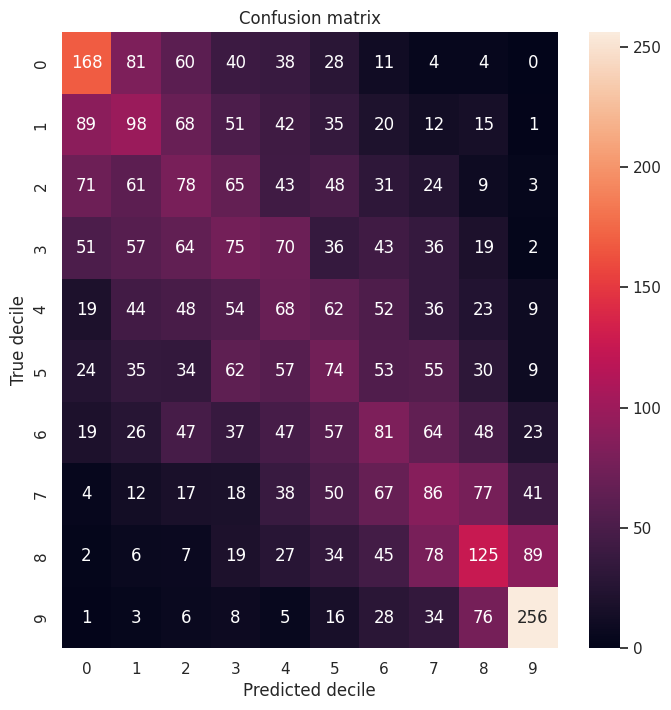

              precision    recall  f1-score   support

           0       0.38      0.39      0.38       434
           1       0.23      0.23      0.23       431
           2       0.18      0.18      0.18       433
           3       0.17      0.17      0.17       453
           4       0.16      0.16      0.16       415
           5       0.17      0.17      0.17       433
           6       0.19      0.18      0.18       449
           7       0.20      0.21      0.21       410
           8       0.29      0.29      0.29       432
           9       0.59      0.59      0.59       433

    accuracy                           0.26      4323
   macro avg       0.26      0.26      0.26      4323
weighted avg       0.26      0.26      0.26      4323



In [54]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.26 y que precision, recall y f1-score no llegan casi al 0.5, incluso más bajos que en los casos anteriores.

Sabemos que no es el mejor modelo para predicción pero nos da gran interpretabilidad

##9. BAGGING

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=tree, n_estimators=10, random_state=1)

bagging.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=1)

In [56]:
#Utilizamos datos sin escalar
y_pred = bagging.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)
print("MAE", mae)

MSE: 0.1008014892731609
R2: 0.6509485465829433
MAE 0.2451227962932251


In [58]:
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)


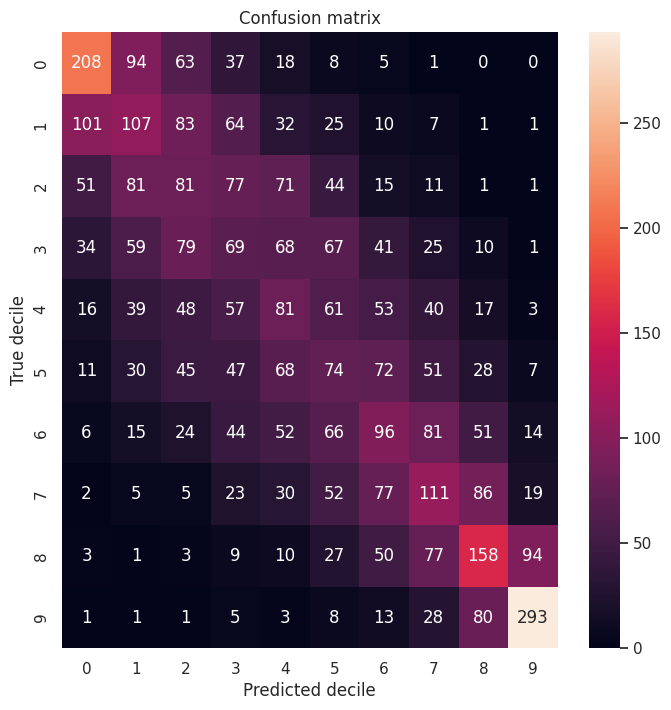

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       434
           1       0.25      0.25      0.25       431
           2       0.19      0.19      0.19       433
           3       0.16      0.15      0.16       453
           4       0.19      0.20      0.19       415
           5       0.17      0.17      0.17       433
           6       0.22      0.21      0.22       449
           7       0.26      0.27      0.26       410
           8       0.37      0.37      0.37       432
           9       0.68      0.68      0.68       433

    accuracy                           0.30      4323
   macro avg       0.30      0.30      0.30      4323
weighted avg       0.30      0.30      0.30      4323



In [59]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.30 y que precision, recall y f1-score no llegan apenas al 0.5.
Resultados parecidos a los casos anteriores, pensamos que igual las variables escogidas, no es la mejor selección que podíamos hacer, pero nuestro objetivo es valorara los modelos heho un preprocesamiento

##10. RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=25, random_state=0)
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [61]:
#Usamos datos escalados
y_pred = regressor.predict(X_test_scaled)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)
print("MAE", mae)

MSE: 0.0979804650268417
R2: 0.660717078976687
MAE 0.24073961279099668


In [63]:
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

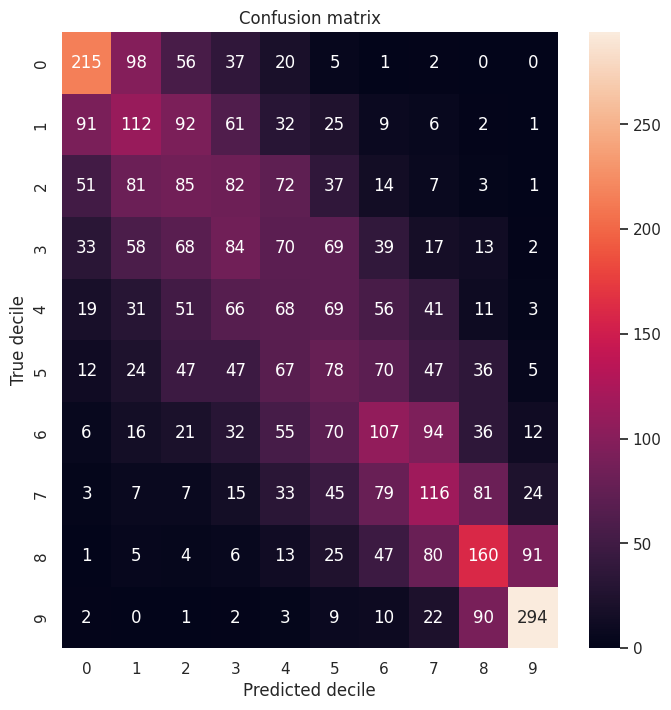

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       434
           1       0.26      0.26      0.26       431
           2       0.20      0.20      0.20       433
           3       0.19      0.19      0.19       453
           4       0.16      0.16      0.16       415
           5       0.18      0.18      0.18       433
           6       0.25      0.24      0.24       449
           7       0.27      0.28      0.28       410
           8       0.37      0.37      0.37       432
           9       0.68      0.68      0.68       433

    accuracy                           0.31      4323
   macro avg       0.31      0.31      0.31      4323
weighted avg       0.31      0.31      0.31      4323



In [64]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.31 y que precision, recall y f1-score no llegan casi al 0.5. Tal y como nos ha salido en los casos anteriores

##11. GRADIENT BOOST

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=5, random_state=1)
gb.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, random_state=1)

In [69]:
#Usamos los datos escalados
y_pred = gb.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2", r2)
print("MSE", mse)
print("MAE", mae)

In [70]:
#Resumen de la importancia de cada variable con lo parámetros elegidos
importances = gb.feature_importances_
features = X.columns.tolist()

importances_df = pd.DataFrame({"feature": features, "importance": importances})
importances_df = importances_df.sort_values(by="importance", ascending=False)

print(importances_df.head(28))

              feature  importance
8             grade_e    0.489015
2         sqft_living    0.242583
9     yr_renovated_tr    0.095910
5  sqftliving/sqftlot    0.083289
7              view_e    0.026794
4       sqft_basement    0.017939
3          sqft_above    0.017422
1           bathrooms    0.015638
6              floors    0.006361
0            bedrooms    0.005049


Podríamos elegir otros parámetros, e optimizarlos.

Vemos que *grade_e* y *sqft_living* son importantes. Depende donde pongamos el umbral de importancia el resto serán importantes o no

In [74]:
predict_deciles = pd.qcut(y_pred, q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

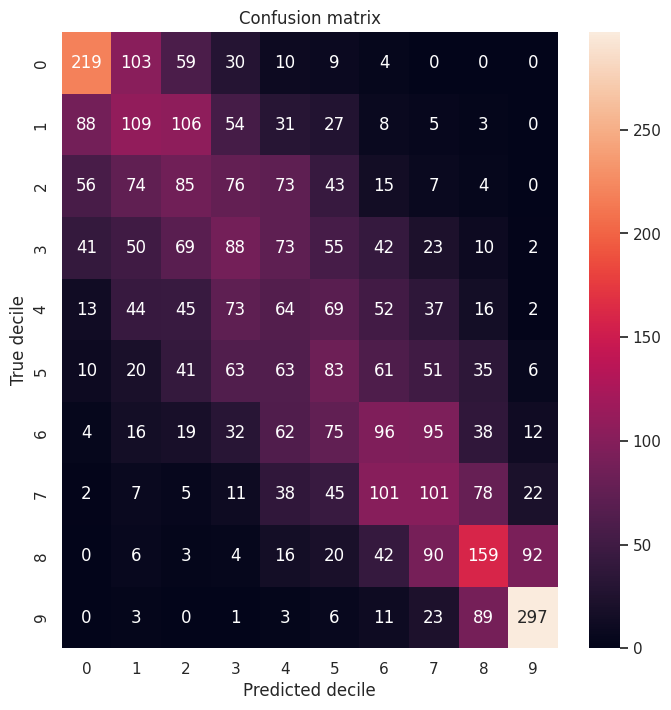

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       434
           1       0.25      0.25      0.25       431
           2       0.20      0.20      0.20       433
           3       0.20      0.19      0.20       453
           4       0.15      0.15      0.15       415
           5       0.19      0.19      0.19       433
           6       0.22      0.21      0.22       449
           7       0.23      0.25      0.24       410
           8       0.37      0.37      0.37       432
           9       0.69      0.69      0.69       433

    accuracy                           0.30      4323
   macro avg       0.30      0.30      0.30      4323
weighted avg       0.30      0.30      0.30      4323



In [76]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.30 y que precision, recall y f1-score no llegan casi al 0.5.
Obtenemos los mismos resultados que en los casos anteriores, no parece que mejoremos la predicción

##12. XGBOOST

In [77]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
y_pred = xgb.predict(X_test_scaled)

In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)
print("MAE", mae)

MSE: 0.09260131092105493
R2: 0.679343803366553
MAE 0.24005565328960238


In [80]:
predict_deciles = pd.qcut(y_pred.ravel(), q=10, labels=False)
actual_deciles = pd.qcut(y_test, q=10, labels=False)

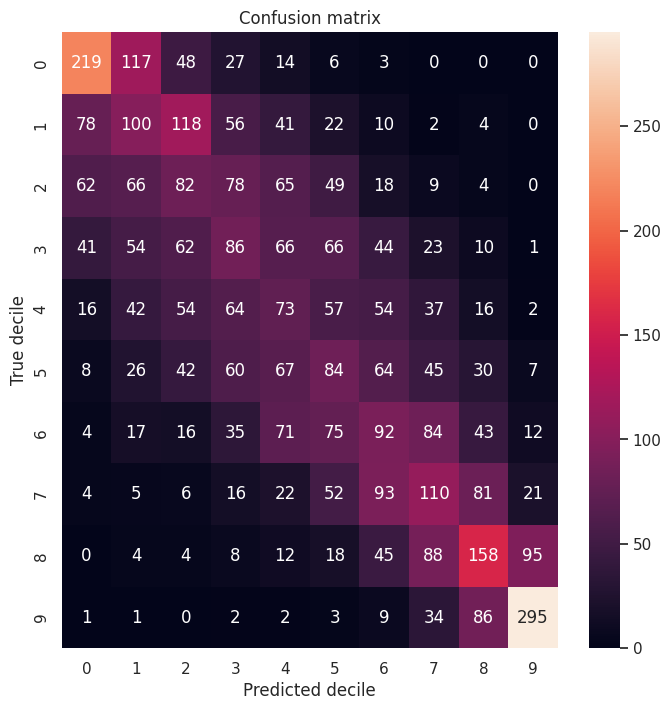

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       434
           1       0.23      0.23      0.23       431
           2       0.19      0.19      0.19       433
           3       0.20      0.19      0.19       453
           4       0.17      0.18      0.17       415
           5       0.19      0.19      0.19       433
           6       0.21      0.20      0.21       449
           7       0.25      0.27      0.26       410
           8       0.37      0.37      0.37       432
           9       0.68      0.68      0.68       433

    accuracy                           0.30      4323
   macro avg       0.30      0.30      0.30      4323
weighted avg       0.30      0.30      0.30      4323



In [82]:
confu_matrix = confusion_matrix(actual_deciles, predict_deciles)
plt.figure(figsize=(8, 8))
sns.heatmap(confu_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True decile')
plt.xlabel('Predicted decile')
plt.show()
print (classification_report(actual_deciles, predict_deciles))

Observamos que accuracy es de 0.3 y que precision, recall y f1-score no llegan casi al 0.5.

##13. ¿Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas

Debemos tener en cuenta varios aspectos

Las métricas para evaluar los resultados son muy similares entre todos los modelos, y que además no son demasiado buenas. Por tanto deberíamos plantearnos que hay problemas con las variables escogidas, deberíamos probar si son pocas, muchas, debemos hacer alguna transformación, si hay variables omitidas... Además al usar deciles para obtener las métricas, puede que nos distorsione algunos resultados.

Por tanto, a pesar de que tenemos diferentes métricas para evaluar modelos, estas son muy similares tanto dentro de un modelo como entre diferentes modelos. Esto significa que aunque consideremos una métrica más importante que otra, no podríamos establecer un orden estricto porque, en primer lugar, el orden no cambiaría entre las diferentes métricas y, en segundo lugar, para cada métrica, la evaluación de los distintos modelos es prácticamente la misma. En otras palabras, las diferencias en las evaluaciones de los modelos según diferentes métricas son muy pequeñas, lo que dificulta la elección de una métrica "ganadora" y de un modelo "mejor" que otros.


##14. En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación

A la hora de clasificar correctamente las variables, podemos hacerlo usando métodos de selección de características.Existen diferentes métodos para seleccionar las características más importantes de un conjunto de datos en función de su relación con la variable objetivo. Los más comunes.

**SelectKBest**: Este método se basa en un test estadístico (como chi-cuadrado o ANOVA) que evalúa la relación entre cada variable y la variable objetivo. Selecciona las K mejores características en función de su puntuación en el test estadístico.

**Recursive Feature Elimination (RFE)**: Este método utiliza un modelo de clasificación o regresión para evaluar la importancia de cada variable. En cada iteración, se va eliminando la variable menos importante hasta que se alcanza el número deseado de variables. La importancia de cada variable se mide mediante su ranking de eliminación.

**Feature Importance**: Este método utiliza ensambladores (como Random Forest o XGBoost) para evaluar la importancia de cada variable en la predicción. La importancia se mide por la reducción de la impureza del nodo que se obtiene al dividir los datos por esa variable.

En resumen, estos métodos nos permiten seleccionar las características más importantes para mejorar el rendimiento de nuestro modelo y reducir la complejidad de los datos.

Veamos la importancia de las variables del Data Frame original

In [84]:
#'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])
df['date'] = (df['date'] - df['date'].min()).dt.days


In [85]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [86]:
#Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [87]:
#Random forest
regressor = RandomForestRegressor(n_estimators=25, random_state=0)
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [88]:
V#Serie con la importancia y las ordenamos
importances = pd.Series(regressor.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

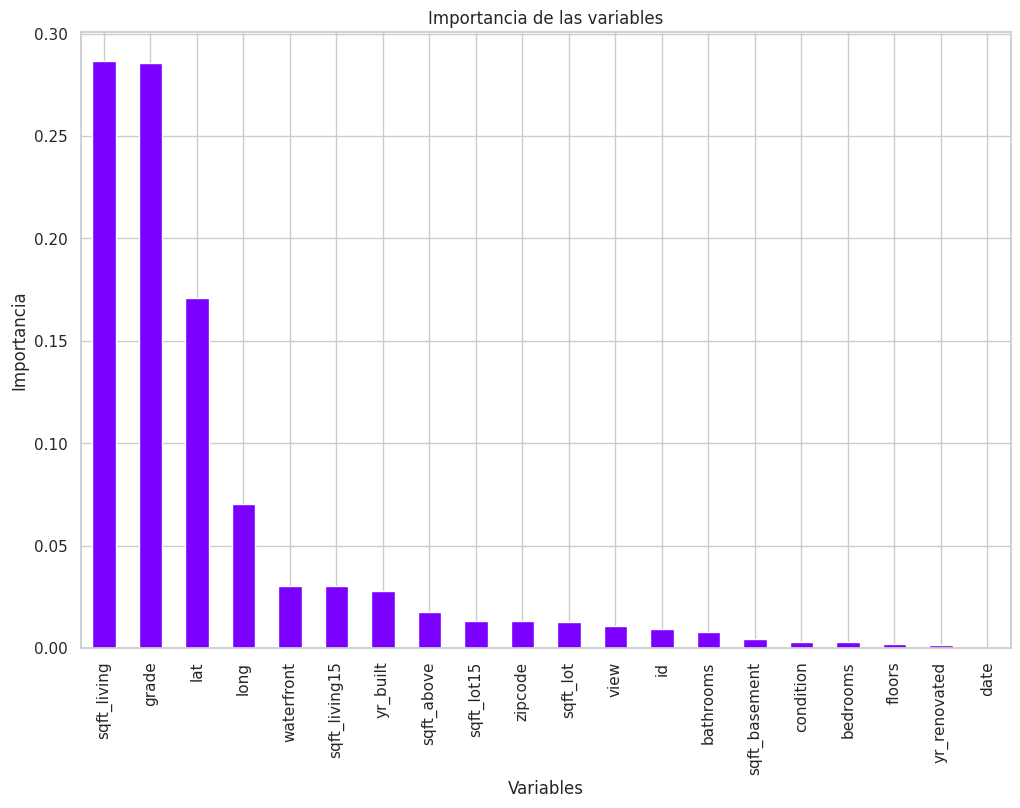

In [89]:
plt.figure(figsize=(12,8))
importances_sorted.plot(kind='bar')
plt.title('Importancia de las variables')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.show()

Vemos que parte de las variables importantes, las hemos utilizado como *sqft_living* o *grade*.

Observamos también que *lat* y *long* que decidimos no incluirlas, en efecto son variables importantes.

No nos sorprende la importancia de las variables de superficie, pero si la de *bathrooms* y *bedrooms*, que es completamente contraintuitivo. Sin embargo, si que nos sorprende la importancia de *waterfront*.

La variable *condition* nos queda un resultado parecido, pero *yr_bulit* tenía una correlación muy baja en relación a la importancia que presenta. También la variable *yr_renovated*, (recordemos que usamos una transformada con el año de construccion: *yr_transformated_tr*) tenía una correlación baja con el precio, pero tampoco la más baja.

En conclusión, vemos que hemos podido cometer inicialmente algunos errores al no incluir algunas variables importantes que nos habrían ayudado a tener mejores modelos.